In [2]:
import popgetter
from icecream import ic
import pandas as pd

catalog : pd.DataFrame = popgetter.defs.load_asset_value(["be", "catalog_as_dataframe"])

# catalog.head()

geo_cat = catalog[catalog["source_format"].str.contains("http://publications.europa.eu/resource/authority/file-type/GEOJSON")]
# geo_cat.head(10)
# ic(len(geo_cat))


pop_stats = catalog[catalog["human_readable_name"].str.contains("Population by Statistical sector")]
pop_stats = pop_stats[["node", "human_readable_name", "description"]]
# ic(pop_stats.head(20))

for i, row in pop_stats.iterrows():
    print(row["node"])
    print(row["human_readable_name"])
    print(row["description"])
    print("~~~~~~~~~~~~~~~~~~~~~~~~")

# Statistical sectors 2023
            # "node" : "https://statbel.fgov.be/node/4726",


/Users/a.smith/.pyenv/versions/3.11.3/lib/python3.11/typing.py:1255: ExperimentalWarning: Class `_PipesSubprocess` is experimental. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  result = self.__origin__(*args, **kwargs)
/Users/a.smith/.pyenv/versions/3.11.3/envs/popget-dev/lib/python3.11/site-packages/dagster/_core/pipes/subprocess.py:57: ExperimentalWarning: Class `PipesTempFileContextInjector` is experimental. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  or Pipes

https://statbel.fgov.be/node/1435
Population by Statistical sector
Description: Population by Statistical sector
Period: 2011
Metadata: Variables, Resident population structure and change (PDF, 67.75 Kb)
More information, data and publications on this topic on Statbel
 
~~~~~~~~~~~~~~~~~~~~~~~~
https://statbel.fgov.be/node/1436
Population by Statistical sector
Description: Population by Statistical sector
Period: 2015
Metadata: Variabele, Resident population structure and change (PDF, 67.75 Kb)
More information, data and publications on this topic on Statbel
 
~~~~~~~~~~~~~~~~~~~~~~~~
https://statbel.fgov.be/node/1437
Population by Statistical sector
Description: Population by Statistical sector
Period: 2016
Metadata: Variables, Resident population structure and change (PDF, 67.75 Kb)
More information, data and publications on this topic on Statbel
 
~~~~~~~~~~~~~~~~~~~~~~~~
https://statbel.fgov.be/node/1438
Population by Statistical sector
Description: Population by Statistical sector

2024-02-23 12:59:46 +0000 - dagster - DEBUG - system - Loading file from: /Users/a.smith/code/urbananalytics/popgetter/persist/storage/be/individual_census_table/https:/statbel.fgov.be/node/4726 using PickledObjectFilesystemIOManager...


<Axes: >

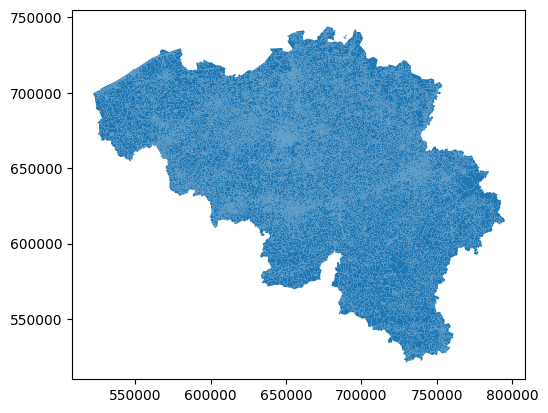

In [4]:
geometry = popgetter.defs.load_asset_value(["be", "individual_census_table"], partition_key="https://statbel.fgov.be/node/4726")
# Statistical sectors 2023
# geometry.head()
# ic(geometry.columns)
geometry.plot(legend=True)

